**Ranked Retrieval by K-means clustering**

In [ ]:
# Text processing and NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from collections import defaultdict,Counter
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.cluster import KMeans
import json
import io
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

In [ ]:
# Dataset representation
import pandas as pd
import numpy as np

# String manipulations
import string
import re
import io

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving cleaned_case_docs.csv to cleaned_case_docs.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['cleaned_case_docs.csv']))
df.head(10)


Unnamed: 0  ...                                      cleaned_words
0           0  ...  masud khan v state uttar pradeshsuprem court i...
1           1  ...  prabhakaran nair etc v state tamil nadu orsupr...
2           2  ...  hiten p dalal v bratindranath banerjesuprem co...
3           3  ...  ashok kumar other v state tamil nadusuprem cou...
4           4  ...  ashok dhingra v nct delhisuprem court india3 m...
5           5  ...  bridg roof compani india limit other v union i...
6           6  ...  main pal v state haryanasuprem court india7 se...
7           7  ...  minor p rajendran v state madra othersuprem co...
8           8  ...  state bihar v gopi kishor prasadsuprem court i...
9           9  ...  food corpor india anoth v yadav engin contract...

[10 rows x 5 columns]

In [ ]:
#list of case document Ids
l2=[]
l2=list(df.FileName)

Text Processing

In [ ]:
def remove_punctuation(text):
    #also whitespace
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator)

def remove_stop_words_and_lemmatize(sentence):
  sentence=remove_punctuation(sentence)
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(sentence) 
  word_tokens=[word.lower() for word in word_tokens]
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  lemmatizer = WordNetLemmatizer()
  lemmatized_sentence=[lemmatizer.lemmatize(w) for w in filtered_sentence]  
  return lemmatized_sentence

In [ ]:
#Preprocess case docs!
DF=defaultdict(set)
doc_count=defaultdict()
doc_tokens=defaultdict()
cleaned_doc_list=[]
for i,row in df.iterrows():
    doc=row['Content']
    tokens=remove_stop_words_and_lemmatize(doc)
    doc_string=' '.join(tokens)
    cleaned_doc_list.append(doc_string)

documents = list(cleaned_doc_list)
df['cleaned_doc']=cleaned_doc_list
print(df)

      Unnamed: 0  ...                                        cleaned_doc
0              0  ...  masud khan v state uttar pradesh supreme court...
1              1  ...  prabhakaran nair etc v state tamil nadu or sup...
2              2  ...  hiten p dalal v bratindranath banerjee supreme...
3              3  ...  ashok kumar others v state tamil nadu supreme ...
4              4  ...  ashok dhingra v nct delhi supreme court india ...
...          ...  ...                                                ...
2909        2909  ...  rajendra singh v state uttaranchal supreme cou...
2910        2910  ...  food corporation india anr v seil ltd or supre...
2911        2911  ...  state kerala v sasi supreme court india 31 oct...
2912        2912  ...  columbia sportswear company v director income ...
2913        2913  ...  bharat gurjar others v state rajasthan supreme...

[2914 rows x 6 columns]


In [ ]:
#list of case doc ids
len(documents)

2914

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words={'english'}, min_df=1, max_features=5000)
X = vec.fit_transform(documents)
Y= X.toarray()


In [ ]:
X.shape

(2914, 5000)

In [ ]:
len(Y)

2914

In [ ]:
df1 = pd.DataFrame(Y, index=l2)

In [ ]:
df1


0     1         2         3     ...  4996      4997  4998  4999
C1      0.0   0.0  0.000000  0.000000  ...   0.0  0.000000   0.0   0.0
C10     0.0   0.0  0.000000  0.001299  ...   0.0  0.000000   0.0   0.0
C100    0.0   0.0  0.000000  0.004996  ...   0.0  0.000000   0.0   0.0
C1000   0.0   0.0  0.000000  0.019500  ...   0.0  0.022263   0.0   0.0
C1001   0.0   0.0  0.000000  0.000000  ...   0.0  0.000000   0.0   0.0
...     ...   ...       ...       ...  ...   ...       ...   ...   ...
C995    0.0   0.0  0.000000  0.014109  ...   0.0  0.012081   0.0   0.0
C996    0.0   0.0  0.000000  0.005453  ...   0.0  0.000000   0.0   0.0
C997    0.0   0.0  0.047237  0.011544  ...   0.0  0.000000   0.0   0.0
C998    0.0   0.0  0.000000  0.002919  ...   0.0  0.000000   0.0   0.0
C999    0.0   0.0  0.000000  0.045040  ...   0.0  0.000000   0.0   0.0

[2914 rows x 5000 columns]

In [ ]:
data_top = df1
doc_ids=list(data_top.index)
len(doc_ids)

2914

In [ ]:
from collections import defaultdict 
#doc dictionary to store docume id : index of the doxument vector in tf-idf document-term matrix
d = defaultdict()
for i in range(len(doc_ids)):
  d[doc_ids[i]]= i


In [ ]:
#d is the dictionary with has key=doc id : value = row index number in the numpy array holding its tfidf vector
len(d)

2914

In [ ]:
#each row of X is a vector representation of a case document
X

<2914x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1464261 stored elements in Compressed Sparse Row format>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#we choose k as square root of the #documents
k=55
kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10, max_iter=300, random_state=0).fit(X)
labels=kmeans.labels_
docs_cl=pd.DataFrame(list(zip(l2,labels)),columns=['Doc Id','cluster'])
print(docs_cl.sort_values(by=['cluster']))

     Doc Id  cluster
531   C1477        0
853   C1767        0
1434   C229        0
1391  C2250        0
2351   C492        0
...     ...      ...
2301   C447       54
2502   C628       54
221   C1198       54
2627   C740       54
2469   C599       54

[2914 rows x 2 columns]


Cluster: 0
Doc Id
 C1004
 C1034
 C1177
 C1209
 C1219
 C1259
 C1337
 C1342
 C1343
 C1345
 C1471
 C1477
 C1572
 C1581
 C1627
 C1659
   C17
  C172
 C1736
 C1767
 C1825
 C1913
 C1926
  C195
 C1982
 C1995
 C2024
 C2228
 C2250
  C229
 C2292
 C2346
 C2582
 C2586
 C2592
 C2608
 C2649
 C2692
 C2703
  C273
 C2772
  C279
  C314
  C330
  C371
  C424
  C492
  C515
  C540
  C668
  C771
  C851
  C876
  C900
  C941
  C964


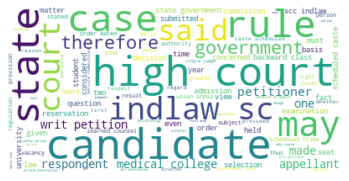

Cluster: 1
Doc Id
 C1325
 C1406
 C1701
 C1986
 C2316
 C2318
 C2424
 C2449
 C2475
 C2725
  C307
  C348
  C516
  C829


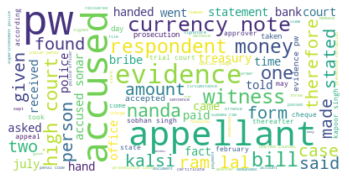

Cluster: 2
Doc Id
 C1046
  C106
 C1195
 C1384
  C139
 C1469
  C147
  C170
 C1720
 C1884
 C2003
 C2333
 C2446
 C2458
  C271
 C2713
 C2784
 C2817
  C282
 C2893
  C317
  C323
   C47
    C5
  C574
  C577
   C59
   C75
  C774
   C79
  C816
  C932


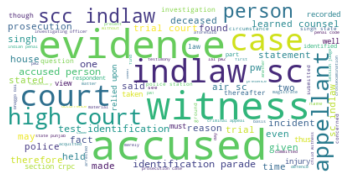

Cluster: 3
Doc Id
 C1011
 C1024
 C1043
 C1061
 C1166
 C1168
 C1173
  C119
   C12
 C1243
 C1264
 C1302
 C1379
 C1388
 C1460
 C1504
 C1533
 C1570
 C1584
   C16
 C1615
 C1617
 C1625
 C1648
 C1710
 C1739
 C1768
 C1783
 C1798
 C1817
 C1836
 C1848
 C1869
 C1949
 C1966
 C1967
 C1978
 C2041
 C2115
 C2122
 C2142
 C2156
 C2163
 C2171
 C2217
 C2235
 C2239
 C2308
 C2338
 C2353
 C2461
  C251
 C2511
 C2525
 C2580
 C2599
 C2629
 C2687
 C2701
 C2789
 C2803
 C2807
 C2810
 C2829
 C2850
 C2902
  C297
  C315
  C318
  C351
    C4
  C428
  C444
  C468
   C50
  C509
  C526
  C547
  C553
  C559
  C564
  C580
  C621
  C669
  C719
  C738
  C824
  C827
  C840
  C884
  C902
  C905
  C974
  C979
  C983
   C99
  C999


Cluster: 4
Doc Id
 C1013
 C1081
 C1125
  C113
 C1169
 C1330
 C1369
 C1414
 C1717
 C1877
 C1879
 C2065
  C218
 C2198
  C231
  C235
  C245
 C2516
 C2605
 C2758
   C28
 C2814
 C2871
  C359
  C429
  C433
  C543
  C629
  C733
  C807


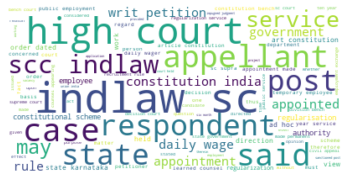

Cluster: 5
Doc Id
 C1009
 C1071
 C1097
 C1129
 C1242
 C1253
 C1299
 C1474
 C1484
 C1591
 C1633
 C1730
 C1840
 C1918
 C1942
 C1945
 C2095
 C2189
  C223
 C2278
 C2284
 C2585
 C2700
 C2708
 C2743
 C2755
 C2763
 C2770
 C2782
 C2799
 C2854
 C2862
  C415
  C427
  C480
  C653
  C710
  C770
  C888
  C899
  C987


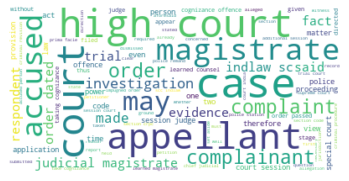

Cluster: 6
Doc Id
 C1089
  C111
 C1185
 C1241
 C1294
 C1316
 C1554
 C1577
 C1661
 C1713
 C1751
 C1890
  C196
 C1985
 C2011
 C2014
 C2141
  C219
 C2200
 C2320
 C2334
  C260
 C2622
 C2781
 C2905
  C334
  C470
  C555
  C637
  C704
  C741
  C855
  C906


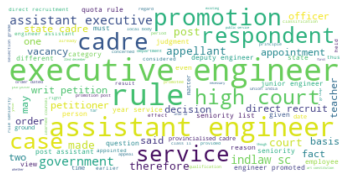

Cluster: 7
Doc Id
 C1022
 C1078
 C1105
 C1132
 C1142
 C1146
 C1161
 C1186
 C1187
 C1204
 C1224
 C1265
 C1309
 C1313
 C1394
 C1395
 C1404
 C1434
 C1442
 C1465
 C1527
 C1580
 C1612
 C1635
 C1640
 C1683
 C1704
 C1733
 C1759
  C181
 C2013
 C2070
 C2165
 C2168
 C2194
 C2204
 C2208
 C2266
 C2344
 C2363
 C2380
 C2401
 C2436
 C2464
 C2466
 C2499
  C253
 C2624
 C2661
 C2702
 C2833
 C2869
  C287
 C2875
  C309
  C349
  C392
   C41
  C432
  C443
  C473
  C482
  C491
   C64
  C648
  C755
  C809
  C835
   C84
  C856
  C881
  C945
  C951
  C970
  C986


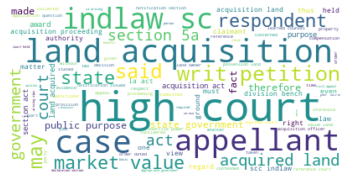

Cluster: 8
Doc Id
 C1065
 C1066
 C1099
 C1103
 C1112
 C1121
 C1153
 C1163
 C1189
 C1216
 C1225
 C1239
 C1328
 C1347
 C1352
 C1459
 C1491
 C1518
 C1539
 C1548
 C1563
 C1573
 C1603
 C1622
 C1652
  C166
 C1680
 C1696
 C1700
 C1702
 C1785
 C1810
  C184
 C1854
 C1938
 C1943
 C1957
 C1959
 C1960
 C2073
 C2077
 C2080
 C2177
 C2196
 C2210
 C2222
 C2258
 C2267
  C240
 C2421
 C2508
 C2520
 C2532
 C2542
 C2553
 C2590
 C2595
 C2635
  C269
 C2694
 C2715
 C2736
 C2737
 C2816
 C2844
 C2887
  C365
  C397
  C402
  C465
  C471
  C527
  C549
  C565
  C596
  C642
  C688
  C691
  C699
  C703
   C71
  C760
  C813
  C915
  C922
  C939
  C940
  C972
  C997


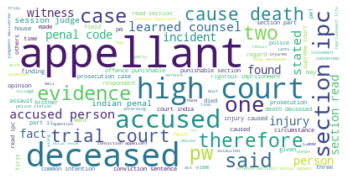

Cluster: 9
Doc Id
 C1111
 C1208
 C1235
  C131
  C132
 C1332
 C1354
  C145
 C1457
 C1531
 C1547
  C161
 C1642
 C1653
  C175
 C1794
 C1845
 C1858
 C2006
 C2009
 C2093
 C2098
 C2190
 C2257
   C23
 C2374
 C2389
 C2509
  C262
 C2643
 C2691
 C2712
 C2742
 C2787
  C360
  C622
   C67
   C73
  C730
  C737
  C761
    C8


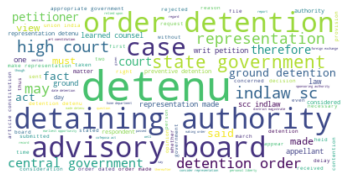

Cluster: 10
Doc Id
 C1164
 C1171
 C1254
 C1393
 C1439
 C1549
 C1585
 C1698
 C1728
 C1800
 C1803
 C1818
 C1865
 C1882
 C1956
 C1996
 C2018
 C2052
  C210
 C2114
 C2238
 C2261
 C2270
 C2303
 C2326
 C2373
 C2384
 C2404
 C2434
 C2467
 C2496
 C2571
 C2576
 C2685
 C2738
 C2739
 C2776
 C2795
 C2797
 C2822
 C2866
 C2888
  C363
  C487
  C600
  C632
  C650
  C654
  C664
  C686
  C722
  C744
  C937
  C960


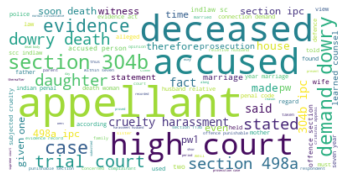

Cluster: 11
Doc Id
 C1010
 C1063
  C107
 C1154
 C1183
 C1190
 C1193
  C123
 C1252
 C1263
 C1329
 C1339
 C1488
 C1536
  C154
 C1597
 C1614
  C167
 C1671
 C1804
 C1932
 C1972
  C212
 C2135
 C2152
 C2169
 C2185
 C2375
 C2480
 C2538
 C2745
  C284
 C2851
 C2883
 C2889
  C295
  C354
  C379
  C431
  C437
  C438
  C453
  C498
   C51
  C537
   C56
  C567
  C655
  C768
   C80
  C833
  C910
  C930
   C97


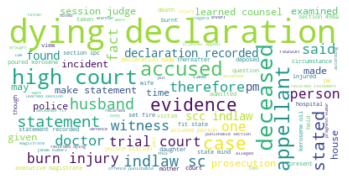

Cluster: 12
Doc Id
  C102
 C1064
 C1076
 C1226
 C1228
 C1283
 C1408
 C1453
 C1613
 C1973
 C2058
 C2083
 C2150
 C2249
 C2252
 C2407
 C2450
 C2886
  C320
  C639
  C660
  C723
  C815


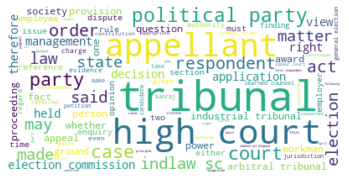

Cluster: 13
Doc Id
 C1041
 C1060
  C109
 C1091
 C1130
 C1196
 C1200
 C1202
 C1210
 C1227
  C128
  C130
 C1304
 C1377
 C1396
 C1397
  C141
 C1449
  C152
 C1574
  C162
 C1667
 C1738
 C1746
  C180
  C182
 C1843
  C186
 C1861
 C1870
 C1887
 C1935
 C2008
 C2181
 C2195
 C2254
 C2328
  C236
  C237
 C2371
 C2388
 C2418
 C2469
 C2527
 C2588
 C2740
 C2760
 C2768
 C2815
 C2885
  C327
  C338
  C364
  C546
  C585
    C7
  C788
   C82
  C952
  C988


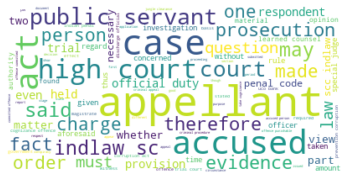

Cluster: 14
Doc Id
    C1
 C1008
 C1020
  C105
 C1072
 C1100
 C1117
  C114
 C1150
 C1237
 C1238
 C1278
  C129
 C1301
 C1307
 C1314
 C1319
 C1327
 C1346
 C1382
 C1400
 C1409
  C143
 C1435
 C1456
 C1466
 C1473
 C1476
 C1508
  C151
 C1542
 C1558
 C1560
  C157
  C158
 C1598
  C165
 C1668
 C1675
 C1693
 C1718
 C1741
 C1795
 C1822
 C1839
 C1873
 C1898
 C1901
  C191
 C1912
 C1980
 C1999
 C2010
 C2034
 C2047
 C2062
  C208
 C2084
 C2092
 C2094
 C2096
 C2116
 C2144
   C22
 C2216
 C2269
 C2282
 C2324
 C2325
 C2343
 C2360
 C2370
 C2387
 C2429
  C244
 C2460
 C2497
   C25
 C2515
 C2555
 C2557
 C2564
 C2572
  C258
  C259
 C2609
  C261
 C2612
 C2614
 C2615
 C2617
 C2619
 C2620
 C2670
 C2674
 C2698
 C2744
 C2748
 C2754
 C2791
 C2796
  C281
 C2845
 C2906
 C2913
  C298
    C3
  C304
  C306
  C312
  C326
   C33
  C333
  C341
  C343
  C391
  C394
  C412
  C413
  C420
  C457
  C464
   C48
   C49
  C507
  C519
  C520
  C523
  C530
  C572
  C576
   C69
  C735
  C749
  C775
  C783
  C841
  C842
   C85
  C852
 

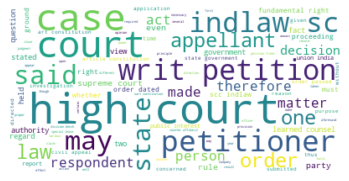

Cluster: 15
Doc Id
 C1062
 C1067
 C1084
 C1101
 C1133
 C1222
 C1258
 C1280
 C1318
  C135
 C1356
 C1454
 C1475
 C1551
 C1576
 C1639
 C1647
 C1714
 C1774
 C1807
 C1813
 C1835
 C1915
 C2046
 C2138
 C2243
 C2256
 C2272
 C2273
 C2300
 C2359
 C2369
 C2394
 C2416
 C2438
 C2439
 C2456
 C2561
 C2658
 C2660
 C2675
 C2826
 C2865
  C332
  C386
  C458
  C461
  C552
  C611
  C615
  C689
  C721
  C729
  C731
  C853
  C857
  C870
  C889
  C981


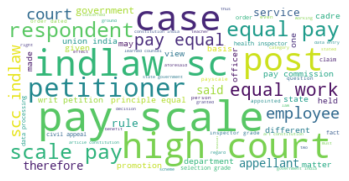

Cluster: 16
Doc Id
 C1025
   C11
 C1113
 C1145
  C118
 C1261
 C1286
 C1363
 C1392
 C1398
 C1423
  C148
 C1532
 C1586
 C1609
 C1669
 C1687
 C1697
 C1750
  C176
 C1764
 C1862
 C1876
 C1881
 C1931
 C1969
 C1992
 C2045
 C2051
 C2137
 C2248
 C2279
 C2286
 C2306
 C2307
 C2345
 C2452
 C2478
 C2583
  C264
 C2654
 C2695
 C2697
 C2710
 C2718
 C2719
 C2734
  C280
 C2882
 C2907
  C305
  C369
  C435
  C448
   C45
  C490
  C556
  C563
  C607
  C609
  C626
  C640
  C665
  C748
   C76
  C773
  C777
  C780
  C794
  C832
  C936
  C956
  C963
  C976


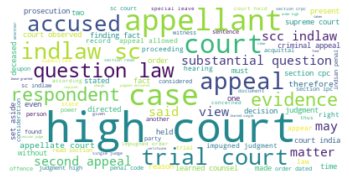

Cluster: 17
Doc Id
  C110
 C1413
 C1528
 C1656
 C1844
 C1979
 C2268
 C2312
 C2610
   C72
  C762
  C800


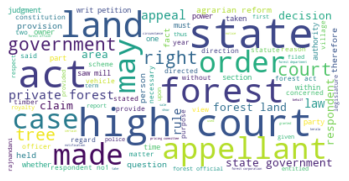

Cluster: 18
Doc Id
 C1000
 C1030
 C1037
 C1048
 C1102
 C1148
 C1184
 C1233
  C124
 C1245
 C1262
 C1270
 C1274
 C1282
 C1297
 C1320
 C1323
 C1324
  C134
 C1349
 C1364
 C1365
 C1374
 C1420
 C1427
 C1432
 C1463
 C1513
 C1524
 C1529
 C1553
 C1578
 C1601
 C1620
 C1621
  C168
 C1703
 C1707
 C1760
 C1828
 C1855
 C1886
 C1900
 C1958
 C1984
  C201
 C2021
 C2036
 C2050
 C2081
  C209
 C2103
  C215
 C2151
  C216
 C2197
 C2224
 C2227
 C2232
 C2253
  C230
 C2361
 C2362
 C2368
 C2378
 C2395
  C249
 C2519
   C26
 C2637
 C2648
  C265
 C2664
 C2671
 C2720
 C2728
 C2764
 C2774
 C2788
 C2790
 C2839
 C2870
 C2892
 C2908
 C2911
  C324
  C325
  C342
  C350
  C407
   C42
  C474
  C494
  C505
  C508
  C529
  C534
  C586
   C62
  C649
  C687
  C717
   C74
   C77
  C793
  C891
  C966


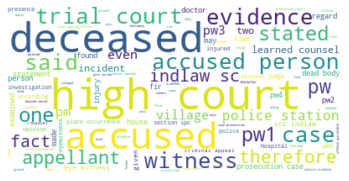

Cluster: 19
Doc Id
 C1122
 C1197
 C1203
 C1205
 C1221
 C1231
 C1293
 C1341
 C1399
 C1493
 C1509
 C1637
 C1641
 C1650
 C1664
 C1672
 C1727
  C174
 C1799
 C1833
 C1981
  C204
 C2042
 C2068
 C2079
 C2226
  C238
 C2591
 C2621
 C2630
 C2707
 C2786
 C2884
  C289
 C2912
  C313
  C316
  C345
  C347
   C38
  C388
  C503
  C525
  C613
  C663
  C681
  C725
  C806
  C904
  C907
  C916
  C942


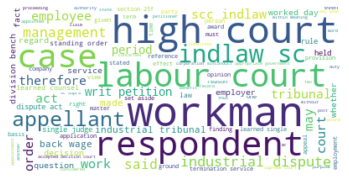

Cluster: 20
Doc Id
 C1213
 C1326
 C1401
 C1429
 C1726
 C1745
 C1763
 C1780
 C1826
 C1899
 C1909
  C220
 C2218
 C2233
 C2259
  C232
 C2543
 C2560
 C2636
 C2680
 C2835
 C2837
  C288
 C2900
  C296
  C319
  C416
  C603
  C617
  C690
  C787
  C878


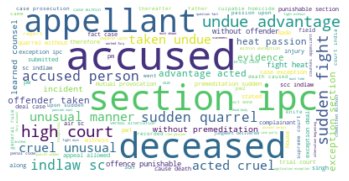

Cluster: 21
Doc Id
 C1001
 C1180
 C1188
 C1248
  C127
 C1321
 C1407
 C1470
 C1478
 C1492
 C1575
 C1722
 C1762
 C1863
 C1946
 C2031
 C2044
 C2118
 C2143
  C217
  C221
 C2479
 C2597
 C2848
 C2877
  C293
  C335
  C344
  C382
  C671
  C708
  C714
  C745
  C747
  C795
  C819
  C847
  C908
  C984


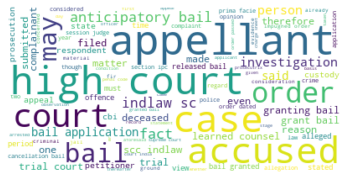

Cluster: 22
Doc Id
 C1031
 C1045
 C1074
 C1229
 C1246
 C1390
 C1455
 C1564
 C1582
 C1681
 C1743
 C1885
 C1937
 C1997
 C2133
 C2178
 C2255
 C2262
 C2309
 C2342
 C2600
  C266
 C2749
 C2777
 C2811
  C302
  C408
  C469
  C496
  C518
  C539
  C582
  C606
  C652
  C759
  C886
  C944


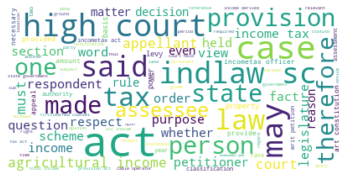

Cluster: 23
Doc Id
 C1028
 C1057
 C1082
 C1115
 C1165
 C1275
 C1308
 C1361
 C1419
 C1447
 C1501
 C1506
 C1519
 C1594
 C1624
 C1638
 C1673
 C1691
 C1724
 C1753
 C1806
 C1823
 C1864
 C1910
 C1924
 C2002
 C2032
 C2039
 C2049
 C2060
 C2091
 C2107
 C2147
 C2157
 C2175
 C2183
 C2231
 C2264
 C2289
 C2355
  C243
 C2440
 C2441
 C2455
 C2501
 C2510
 C2556
 C2574
 C2594
 C2655
  C268
 C2705
  C275
 C2805
 C2806
 C2838
 C2873
  C484
  C493
  C497
  C517
  C551
  C608
  C811
  C814
  C859
  C864
  C868
  C869
  C929
  C961
  C985


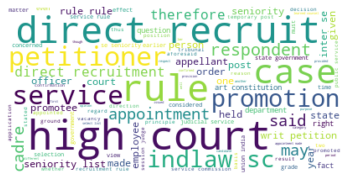

Cluster: 24
Doc Id
 C1023
 C1026
 C1092
 C1114
 C1152
  C117
 C1285
 C1306
 C1338
 C1381
 C1403
  C150
 C1566
 C1593
 C1643
 C1670
 C1677
 C1771
 C1773
 C1847
 C1859
 C1875
 C1878
 C1906
 C1929
 C2001
   C21
 C2121
 C2134
 C2149
 C2230
 C2236
 C2297
 C2393
 C2413
 C2490
 C2523
 C2546
 C2563
 C2565
 C2669
 C2673
 C2686
 C2688
   C27
 C2726
 C2747
 C2794
 C2804
 C2831
  C286
 C2874
 C2894
  C321
  C331
  C385
  C390
  C528
  C542
  C545
  C587
  C597
  C605
  C612
  C631
  C659
  C674
  C677
  C678
  C694
  C750
  C764
  C772
  C785
   C81
  C911
  C912
  C914
  C968


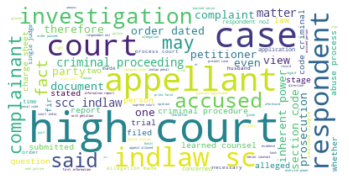

Cluster: 25
Doc Id
 C1021
 C1033
 C1038
 C1039
  C104
 C1047
 C1080
 C1127
 C1143
 C1214
 C1257
 C1267
 C1276
 C1296
 C1311
 C1359
 C1370
 C1418
 C1431
  C146
 C1485
 C1515
 C1526
 C1537
 C1545
 C1555
  C156
 C1587
  C163
 C1634
 C1654
  C169
 C1690
 C1695
 C1755
 C1766
 C1777
 C1834
  C185
 C1851
 C1852
 C1868
 C1893
 C1897
   C19
 C1904
 C1964
 C1975
  C198
   C20
  C200
 C2019
 C2038
  C206
 C2063
 C2102
 C2128
 C2159
 C2161
 C2219
 C2237
 C2240
 C2293
 C2301
 C2314
 C2340
 C2341
 C2354
 C2357
 C2379
 C2390
 C2397
 C2398
 C2400
 C2405
 C2406
 C2420
 C2423
 C2428
 C2433
 C2435
 C2437
 C2465
 C2486
 C2537
 C2540
 C2548
  C255
 C2558
 C2652
 C2704
 C2722
 C2723
 C2751
 C2757
 C2769
 C2808
  C283
 C2863
 C2878
 C2904
  C292
  C376
  C383
  C403
  C406
  C409
  C410
  C452
  C459
  C538
  C554
  C562
  C591
  C592
  C595
  C601
   C61
  C614
  C644
  C645
  C661
  C693
  C695
  C713
  C746
  C751
  C753
  C765
  C776
  C790
   C83
  C838
  C848
  C897
  C991


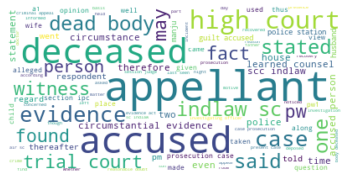

Cluster: 26
Doc Id
 C1106
 C1181
 C1351
 C1422
  C144
 C1561
 C1676
 C1689
 C1709
 C1970
 C2037
 C2040
 C2234
 C2251
  C228
 C2319
 C2330
 C2337
 C2399
 C2481
 C2536
 C2631
 C2735
 C2860
  C346
  C389
  C544
  C658
  C743
  C820
  C825
  C894
  C950
  C973


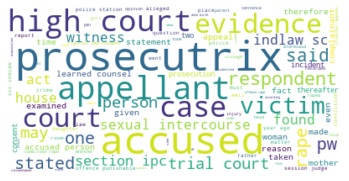

Cluster: 27
Doc Id
  C100
  C103
 C1036
 C1147
 C1336
  C140
 C1544
 C1665
 C1734
 C1747
  C193
    C2
 C2166
 C2322
 C2347
 C2431
 C2453
  C246
  C256
 C2589
 C2711
  C277
  C285
  C294
   C39
  C414
  C417
  C425
  C476
  C483
  C532
  C715
  C805


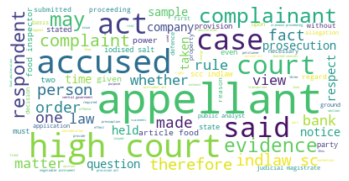

Cluster: 28
Doc Id
 C1016
 C1289
 C1481
 C1623
 C1660
 C1756
 C1812
 C1838
 C2101
 C2154
 C2242
 C2311
 C2313
  C242
 C2462
 C2644
 C2657
 C2721
 C2765
 C2798
 C2846
 C2853
  C455
  C757
  C823
   C95
  C958
  C993


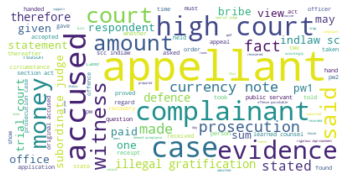

Cluster: 29
Doc Id
 C1085
  C115
  C116
 C1312
 C1424
  C179
 C1808
  C183
  C188
 C2023
 C2087
 C2162
 C2350
 C2367
 C2422
 C2639
 C2668
 C2716
 C2780
 C2856
  C436
   C44
  C504
  C581
  C700
  C792
   C87


Cluster: 30
Doc Id
  C101
 C1086
 C1176
 C1179
 C1220
 C1271
 C1502
 C1588
 C1599
 C1631
 C1646
 C1715
 C1903
 C2076
  C214
 C2241
 C2287
 C2305
 C2385
 C2463
 C2522
 C2531
 C2800
 C2881
  C400
  C423
  C571
  C643
  C679
  C732
  C769
  C854
  C996


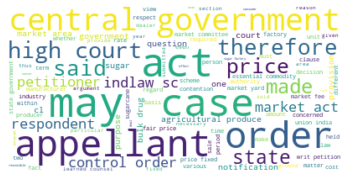

Cluster: 31
Doc Id
 C1050
  C112
 C1206
 C1507
 C2078
 C2146
   C37
  C467
  C550
   C57
  C967


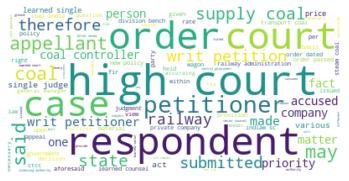

Cluster: 32
Doc Id
 C1104
 C1167
  C122
 C1358
 C1385
 C1386
 C1749
 C1778
 C1850
 C1883
 C1974
 C2260
 C2265
 C2409
 C2425
 C2526
 C2646
 C2731
 C2775
 C2879
  C479
  C522
  C558
  C568
  C641
  C758
   C89
  C898
  C921


Cluster: 33
Doc Id
 C1029
 C1070
 C1137
 C1144
 C1158
 C1172
 C1207
 C1249
 C1250
 C1295
 C1360
 C1425
 C1437
 C1448
 C1450
 C1497
 C1511
 C1520
 C1525
 C1552
 C1556
 C1608
 C1628
 C1645
 C1705
 C1721
 C1740
 C1742
 C1829
 C1860
 C1880
 C1917
 C1921
 C1928
 C1936
 C1950
 C1987
 C2007
 C2033
 C2035
 C2057
 C2064
 C2127
 C2148
 C2184
 C2201
 C2223
 C2244
 C2295
 C2332
  C234
 C2381
 C2386
 C2417
 C2430
 C2451
 C2484
 C2492
  C250
 C2602
 C2641
 C2650
 C2690
 C2752
 C2771
 C2824
 C2861
  C303
  C357
  C426
   C43
  C451
  C481
  C495
  C510
  C511
  C579
   C58
  C588
  C590
  C610
  C624
   C68
  C711
  C726
   C78
  C822
  C828
  C849
   C86
  C860
  C873
  C883
  C901
  C935
  C938
  C953
  C962
  C992


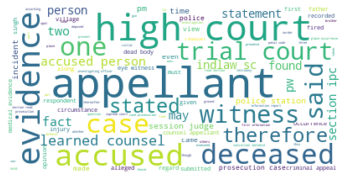

Cluster: 34
Doc Id
 C1155
 C1182
 C1215
 C1260
 C1487
 C1510
  C155
 C1604
 C1606
 C1688
 C1781
 C1919
 C2110
 C2174
 C2205
 C2470
 C2832
 C2864
   C36
  C501
  C634
  C720
  C802
  C812
  C896


Cluster: 35
Doc Id
 C1005
 C1017
 C1019
 C1058
 C1124
 C1178
 C1191
  C120
 C1212
 C1230
  C126
   C13
 C1412
 C1426
 C1430
 C1446
 C1482
   C15
 C1530
 C1651
 C1684
 C1737
 C1809
 C1891
 C1925
 C2004
 C2022
 C2028
 C2104
 C2125
 C2140
 C2212
 C2412
 C2457
 C2541
 C2547
 C2550
 C2640
 C2642
 C2681
 C2683
 C2729
 C2801
 C2855
 C2876
  C290
   C30
  C362
   C40
  C489
  C514
  C789
  C817
  C834
  C858
  C867
    C9
  C918
   C92
  C977
  C982


Cluster: 36
Doc Id
 C1042
 C1095
 C1108
 C1123
 C1128
 C1232
 C1251
 C1298
  C136
 C1490
 C1632
 C1658
 C1731
 C1824
 C1916
 C1947
 C2017
 C2158
 C2164
 C2246
 C2298
 C2351
 C2448
 C2472
 C2494
 C2500
 C2506
 C2554
 C2569
 C2616
 C2653
  C267
  C272
 C2730
 C2852
 C2858
 C2897
  C299
  C374
  C418
  C499
  C506
  C575
  C810
   C91
  C913


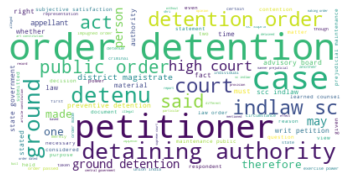

Cluster: 37
Doc Id
 C1040
 C1120
 C1268
 C1467
 C1540
  C171
 C1765
 C2186
 C2383
 C2411
 C2476
 C2483
 C2584
 C2587
  C270
 C2732
 C2802
 C2914
   C31
   C35
  C462
   C52
  C548
  C566
  C604
  C778
  C933
   C94
   C96
   C98


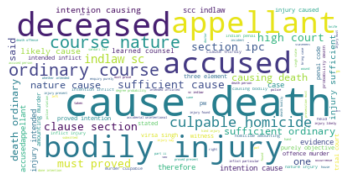

Cluster: 38
Doc Id
   C10
 C1287
 C1391
 C1776
 C1908
 C2213
 C2220
 C2281
 C2352
 C2529
 C2567
 C2568
 C2684
 C2750
 C2840
 C2849
 C2899
  C291
  C311
  C337
  C630
  C667
  C804
  C919
  C948


Cluster: 39
Doc Id
 C1006
 C1012
 C1333
 C1334
 C1366
 C1387
 C1451
 C1592
 C1629
 C1657
 C1761
 C1786
 C1789
 C1911
 C1944
 C1953
 C2016
 C2069
  C207
 C2112
 C2192
 C2207
 C2444
  C248
 C2495
 C2504
 C2551
 C2593
 C2626
 C2645
 C2809
 C2812
 C2825
 C2891
   C29
  C355
  C384
  C405
  C441
  C472
  C478
  C488
  C569
  C638
   C65
  C682
  C718
  C756
  C781
  C784
  C863
  C865
  C920
   C93
  C934
  C943


Cluster: 40
Doc Id
 C1018
 C1079
 C1087
 C1096
 C1139
 C1157
 C1170
 C1217
 C1279
 C1291
 C1303
 C1315
 C1340
 C1344
 C1357
 C1375
  C138
 C1410
 C1468
 C1472
 C1480
 C1500
 C1535
 C1559
 C1600
 C1616
 C1636
 C1719
  C173
 C1782
 C1790
 C1791
 C1816
 C1977
 C1991
 C2027
  C203
 C2055
 C2075
 C2085
 C2105
 C2123
 C2167
 C2199
  C227
 C2285
 C2291
 C2296
 C2377
 C2408
 C2419
 C2443
 C2485
 C2489
 C2502
 C2535
 C2606
 C2627
 C2647
 C2662
 C2663
 C2679
 C2699
 C2753
 C2773
 C2823
 C2827
 C2843
  C300
  C339
  C353
  C380
  C419
  C434
  C449
  C460
  C512
  C561
  C623
  C635
  C646
  C675
  C684
  C706
  C766
  C767
  C799
  C808
  C836
  C866
  C874
  C880
  C882
  C903
  C975
  C978
  C990


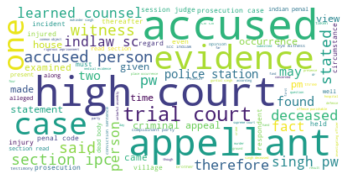

Cluster: 41
Doc Id
 C1068
 C1083
 C1141
 C1156
 C1331
 C1372
 C1495
  C159
 C1611
  C164
 C1814
 C1934
 C1963
 C1965
 C1983
 C2012
 C2025
 C2048
 C2053
 C2054
 C2117
 C2203
 C2410
 C2488
 C2596
 C2656
 C2678
 C2706
 C2766
 C2898
  C310
  C336
  C430
  C475
  C524
   C53
  C531
  C533
  C925
  C928


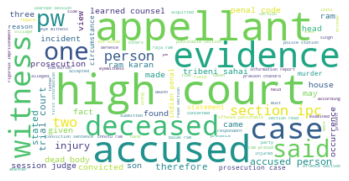

Cluster: 42
Doc Id
 C1002
 C1007
 C1051
 C1075
  C108
 C1118
 C1126
 C1136
 C1149
 C1160
 C1174
 C1175
 C1194
 C1211
 C1244
  C125
 C1255
 C1273
 C1362
 C1367
 C1421
 C1436
 C1445
 C1479
 C1489
 C1512
  C153
 C1557
 C1568
 C1590
 C1602
 C1666
 C1674
 C1694
 C1708
 C1716
 C1748
 C1758
 C1792
 C1801
 C1841
 C1872
 C1907
  C194
 C2030
 C2086
 C2129
 C2136
 C2145
 C2173
 C2182
 C2221
 C2225
  C225
 C2271
 C2275
 C2294
 C2356
 C2366
 C2376
 C2391
 C2396
 C2432
 C2544
 C2559
 C2573
 C2578
 C2579
 C2604
 C2623
  C263
 C2672
 C2689
 C2741
 C2785
 C2793
 C2820
 C2834
  C368
  C393
  C395
  C399
  C445
  C454
  C513
  C541
   C55
  C573
  C584
  C594
   C60
  C616
  C647
  C656
  C662
  C670
  C680
  C692
  C697
  C698
  C709
  C716
  C763
  C779
  C803
  C821
  C830
  C844
  C846
  C879
   C88
  C890
  C954


Cluster: 43
Doc Id
 C1069
 C1378
 C1458
 C1655
 C1752
  C177
 C1770
 C1797
 C1867
 C2097
 C2176
  C252
 C2895
  C366
  C375
  C557
  C602
  C850
  C909
  C927


Cluster: 44
Doc Id
 C1054
 C1134
 C1159
  C121
 C1218
 C1247
 C1272
 C1281
 C1290
 C1355
 C1380
 C1383
 C1415
 C1428
 C1433
 C1444
 C1461
 C1494
 C1498
 C1503
 C1516
 C1562
 C1607
 C1619
 C1626
 C1630
 C1644
 C1649
 C1662
 C1686
 C1723
 C1779
 C1811
 C1831
  C190
 C1905
 C1939
 C1948
 C1955
 C1968
  C197
 C1976
 C1989
 C1998
 C2005
 C2061
 C2071
 C2088
 C2108
 C2132
 C2179
  C224
 C2274
 C2280
 C2299
 C2302
 C2304
 C2323
  C233
 C2364
 C2392
 C2566
 C2575
 C2581
 C2601
 C2651
 C2693
  C274
 C2756
 C2847
 C2867
 C2890
  C329
  C358
  C361
  C381
  C398
  C439
  C446
   C54
  C583
  C598
  C657
  C666
  C673
  C676
  C683
  C705
  C796
  C797
  C839
  C861
  C893
  C949


Cluster: 45
Doc Id
 C1073
 C1110
 C1368
  C137
 C1376
 C1417
 C1569
 C1605
 C1685
 C1744
 C1788
 C1796
 C1821
 C1842
 C1888
 C1962
 C1971
 C1990
 C2059
 C2099
 C2139
 C2180
 C2209
  C226
 C2310
 C2403
 C2447
 C2487
 C2505
  C257
 C2603
 C2633
 C2714
 C2778
  C387
  C463
  C466
  C486
  C500
  C535
  C618
  C625
  C969
  C980
  C995


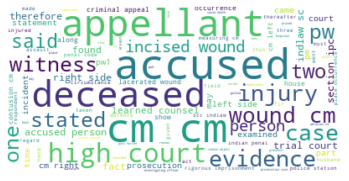

Cluster: 46
Doc Id
 C1088
 C1107
 C1240
 C1288
 C1389
 C1405
 C1462
 C1483
 C1517
 C1523
 C1541
 C1663
 C1679
 C1732
 C1830
 C1837
 C1871
 C1920
 C1994
 C2082
 C2113
 C2277
 C2290
 C2321
 C2491
 C2517
 C2570
 C2613
 C2638
 C2727
  C322
   C34
  C589
  C620
  C633
  C712
  C734


Cluster: 47
Doc Id
 C1056
 C1109
 C1116
 C1119
 C1199
 C1223
 C1277
 C1292
 C1310
 C1353
 C1583
 C1596
 C1618
 C1711
 C1775
 C1927
 C1988
 C2026
 C2043
 C2206
 C2339
 C2358
 C2372
  C239
 C2442
 C2459
 C2696
 C2717
  C276
 C2767
 C2841
  C328
  C340
  C411
  C502
  C536
   C70
  C702
  C727
  C752
  C887
  C947


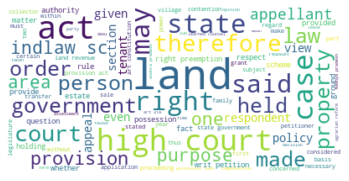

Cluster: 48
Doc Id
 C1052
 C1131
 C1151
 C1350
 C1402
 C1464
 C1550
 C1678
 C1692
 C1699
 C1729
 C1735
 C1769
  C178
 C1802
 C1846
 C1902
 C1914
 C1941
 C2000
 C2015
 C2106
 C2126
 C2153
 C2247
 C2283
 C2327
 C2331
 C2335
 C2365
 C2454
  C247
 C2493
 C2507
 C2512
 C2528
 C2545
 C2607
 C2709
 C2746
 C2759
 C2859
 C2896
 C2910
  C370
  C378
  C404
  C421
  C456
  C477
  C636
  C651
  C685
  C701
  C728
  C739
  C786
  C801
  C818
  C845
  C892
  C917
  C924
  C926


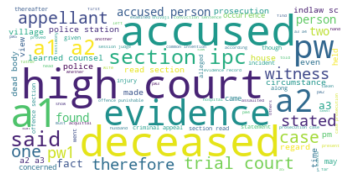

Cluster: 49
Doc Id
 C1003
 C1015
 C1053
 C1093
 C1135
 C1140
 C1192
 C1236
 C1256
 C1284
 C1305
 C1317
 C1335
 C1373
 C1438
 C1440
 C1441
 C1496
 C1514
 C1522
 C1538
 C1543
 C1565
 C1571
 C1579
 C1589
 C1595
 C1706
 C1793
   C18
 C1805
 C1815
 C1820
 C1827
 C1849
 C1856
 C1874
 C1892
 C1894
 C1895
 C1923
 C1951
 C1993
  C202
 C2029
  C205
 C2067
 C2072
 C2074
 C2089
 C2109
  C211
 C2120
 C2124
 C2155
 C2191
 C2214
 C2229
 C2245
 C2288
 C2315
 C2349
 C2382
 C2402
 C2415
 C2482
 C2498
 C2518
 C2539
  C254
 C2549
 C2562
 C2577
 C2618
 C2632
 C2682
 C2724
 C2733
 C2761
 C2762
 C2779
 C2792
 C2819
 C2828
 C2830
 C2842
 C2872
 C2880
 C2901
  C356
  C396
  C440
  C442
   C46
  C485
  C570
  C578
  C593
  C619
  C707
  C736
  C742
  C754
  C782
  C791
  C923
  C946


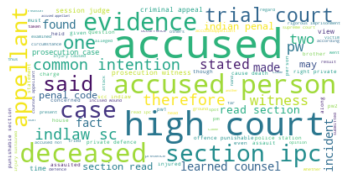

Cluster: 50
Doc Id
 C1044
 C1090
 C1162
 C1322
  C142
 C1452
 C1499
  C187
  C192
 C1933
 C2348
  C241
 C2477
 C2513
 C2524
 C2533
 C2676
 C2903
 C2909
  C301
   C32
    C6
   C63
   C66
  C826
  C843


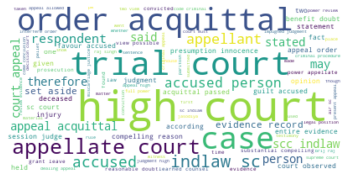

Cluster: 51
Doc Id
 C1094
 C1269
 C1443
 C1787
 C1857
 C1896
 C1940
 C2130
 C2131
 C2172
 C2187
 C2188
 C2215
   C24
 C2426
 C2427
 C2474
 C2514
 C2534
 C2836
 C2868
  C377
  C798
  C989


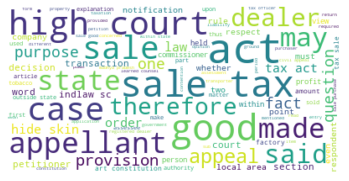

Cluster: 52
Doc Id
 C1014
 C1027
 C1055
 C1059
 C1201
 C1348
 C1371
 C1411
 C1416
 C1505
 C1521
 C1534
 C1546
 C1567
  C160
 C1712
 C1725
 C1754
 C1757
 C1819
 C1832
 C1922
 C1952
 C1954
 C1961
 C2056
 C2100
 C2193
 C2263
 C2276
 C2336
 C2445
 C2473
 C2521
 C2530
 C2552
 C2634
 C2659
 C2677
  C278
 C2783
 C2813
  C367
  C450
  C521
  C560
  C627
  C696
  C724
  C831
  C862
  C895
  C959
  C971
  C994


Cluster: 53
Doc Id
 C1032
 C1035
 C1049
 C1077
 C1098
 C1138
 C1266
 C1300
  C133
   C14
 C1486
  C149
 C1610
 C1772
 C1784
 C1853
 C1866
 C1889
  C189
  C199
 C2020
 C2111
 C2119
  C213
 C2160
 C2170
 C2202
 C2211
 C2317
 C2329
 C2414
 C2468
 C2471
 C2503
 C2598
 C2611
 C2625
 C2666
 C2667
 C2818
 C2821
 C2857
  C308
  C372
  C401
  C422
  C837
  C877
  C965


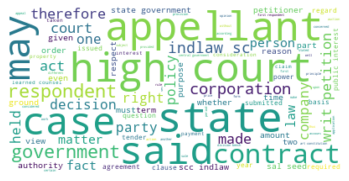

Cluster: 54
Doc Id
 C1198
 C1234
 C1682
 C1930
 C2066
 C2090
  C222
 C2628
 C2665
  C352
  C373
  C447
  C599
  C628
  C672
  C740
  C872


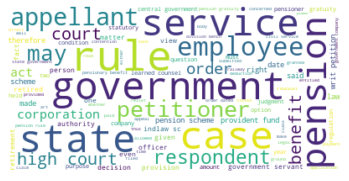

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'docs':documents}
result=pd.DataFrame(result)
for i in range(0,k):
   s=result[result.cluster==i]
   text=s['docs'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(i))
   print('Doc Id')
   titles=docs_cl[docs_cl.cluster==i]['Doc Id']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving query.csv to query.csv


In [ ]:
df_q = pd.read_csv(io.BytesIO(uploaded['query.csv']))
df_q.head()

Column1  Column2                                            Column3
0  AILA_Q1      NaN  The appellant on February 9, 1961 was appointe...
1  AILA_Q2      NaN  The appellant before us was examined as prime ...
2  AILA_Q3      NaN  This appeal arises from the judgment of the le...
3  AILA_Q4      NaN  The Petitioner was married to the Respondent N...
4  AILA_Q5      NaN  This appeal is preferred against the judgment ...

In [ ]:
def give_me_synonyms(word):
  synonyms=set()
  for synset in wordnet.synsets(word):
    for lemma in synset.lemmas():
      syn=lemma.name()
      synonyms.add(syn)
  return list(synonyms)

def expand_query(query,limit=100000):

  query_processed=remove_stop_words_and_lemmatize(query)
  query_new=[]
  count=0
  for word_current in query_processed:
    query_new.append(word_current) #make sure the old word is there
    query_synonyms=give_me_synonyms(word_current)
    for word_new in query_synonyms:
      query_new.append(word_new)
      count+=1
      if(count>limit):
        return query_new

In [ ]:
queries=list(df_q.Column3)
cleaned_queries=[]
relevant_docs=[] #top k relevant docs per query! 
idx=0
for line in queries:
    idx+=1
    #clean query
    tokens=remove_stop_words_and_lemmatize(line)
    query_string=' '.join(tokens)
    cleaned_queries.append(query_string)

In [ ]:
Z = vec.transform(cleaned_queries)
Z.shape

(50, 5000)

In [ ]:
A=Z.toarray()

In [ ]:
 q_labels=kmeans.predict(Z)
 centres=kmeans.cluster_centers_

In [ ]:
q_labels

array([46, 28, 27, 24, 48, 33, 44, 25, 49, 32,  9, 36, 35, 49,  3, 25, 36,
       29, 18,  8, 19, 10, 14, 33,  7, 29, 36, 16, 25, 25, 14, 33, 13, 14,
        3, 14, 18, 14, 25, 15, 18, 24, 14, 24,  8, 33, 18, 13, 28, 28],
      dtype=int32)

In [ ]:
q_list=list(df_q['Column1'])

In [ ]:
q_cl=pd.DataFrame(list(zip(q_list,q_labels)),columns=['Query Id','cluster'])
print(q_cl.sort_values(by=['cluster']))

    Query Id  cluster
34  AILA_Q35        3
14  AILA_Q15        3
24  AILA_Q25        7
44  AILA_Q45        8
19  AILA_Q20        8
10  AILA_Q11        9
21  AILA_Q22       10
47  AILA_Q48       13
32  AILA_Q33       13
33  AILA_Q34       14
35  AILA_Q36       14
22  AILA_Q23       14
37  AILA_Q38       14
30  AILA_Q31       14
42  AILA_Q43       14
39  AILA_Q40       15
27  AILA_Q28       16
40  AILA_Q41       18
36  AILA_Q37       18
18  AILA_Q19       18
46  AILA_Q47       18
20  AILA_Q21       19
41  AILA_Q42       24
43  AILA_Q44       24
3    AILA_Q4       24
28  AILA_Q29       25
7    AILA_Q8       25
38  AILA_Q39       25
29  AILA_Q30       25
15  AILA_Q16       25
2    AILA_Q3       27
49  AILA_Q50       28
48  AILA_Q49       28
1    AILA_Q2       28
25  AILA_Q26       29
17  AILA_Q18       29
9   AILA_Q10       32
23  AILA_Q24       33
45  AILA_Q46       33
31  AILA_Q32       33
5    AILA_Q6       33
12  AILA_Q13       35
26  AILA_Q27       36
11  AILA_Q12       36
16  AILA_Q

In [ ]:
# c is a dictionary that holds key = cluster numbers : value = list of doc/query ids in that cluster
#dictionary for-cluster:documents in that cluster
dc={}
#dictionary for-cluster: queries in that cluster
qc={}
cv=0



In [ ]:
for i in range(55):
  dc[i]=[]
  qc[i]=[]

In [ ]:
for i in range(len(docs_cl)):
  dc[docs_cl['cluster'][i]].append(docs_cl['Doc Id'][i])
for j in range(len(q_cl)):
  qc[q_cl['cluster'][j]].append(q_cl['Query Id'][j])
       


In [ ]:
# a dictionary to store query: (relevant doc, cosime similarity score) values
cos_s={}
for i in range(len(df_q)):
  cos_s[df_q['Column1'][i]] = list()


In [ ]:
q_id = defaultdict()
for i in range(len(df_q)):
  q_id[df_q['Column1'][i]]= i

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:

for x in qc:
  if (len(qc[x])>0):
    #q is a query in the list of a cluster
    for q in qc[x]:
      if(len(dc[x])>0):
        # p is a document in the list of a cluster
        for p in dc[x]:
          #p gives index number of documents tf idf-for index number use d[p]
          #q gives the query id and inedx : q_id[q]
          l=A[q_id[q]]
          m=Y[d[p]]
          cos_s[q].append((p,round(np.dot(l,m),4)))


In [ ]:
 #function to sort pairs of clusters by their LC val in descending order
def Sort_Tuple(tup):  
    return (sorted(tup, key = lambda x: x[1], reverse=True)) 



In [ ]:
for x in cos_s :
  cos_s[x] = Sort_Tuple(cos_s[x])

In [ ]:
cos_s

{'AILA_Q1': [('C1240', 0.4513),
  ('C1240', 0.4513),
  ('C2638', 0.2786),
  ('C2638', 0.2786),
  ('C1994', 0.2695),
  ('C1994', 0.2695),
  ('C1523', 0.2492),
  ('C1523', 0.2492),
  ('C1389', 0.2451),
  ('C1389', 0.2451),
  ('C1405', 0.2401),
  ('C1405', 0.2401),
  ('C1837', 0.2338),
  ('C1837', 0.2338),
  ('C2290', 0.2222),
  ('C2290', 0.2222),
  ('C2727', 0.2171),
  ('C2727', 0.2171),
  ('C1732', 0.2166),
  ('C1732', 0.2166),
  ('C2277', 0.21),
  ('C2277', 0.21),
  ('C2517', 0.2093),
  ('C2517', 0.2093),
  ('C1679', 0.2055),
  ('C1679', 0.2055),
  ('C1483', 0.2053),
  ('C1483', 0.2053),
  ('C712', 0.2035),
  ('C712', 0.2035),
  ('C1088', 0.1995),
  ('C1107', 0.1995),
  ('C1088', 0.1995),
  ('C1107', 0.1995),
  ('C2321', 0.1797),
  ('C2321', 0.1797),
  ('C2113', 0.1779),
  ('C2113', 0.1779),
  ('C1871', 0.1776),
  ('C1871', 0.1776),
  ('C322', 0.1765),
  ('C322', 0.1765),
  ('C2491', 0.1735),
  ('C2491', 0.1735),
  ('C2613', 0.1659),
  ('C2613', 0.1659),
  ('C620', 0.1655),
  ('C620', 

Evaluation Measures

In [ ]:
#Uploading rel docs for comparison and evalutating!
import json
from google.colab import files
uploaded3 = files.upload()
rel_df= pd.read_csv(io.BytesIO(uploaded3['rel_docs.csv']))

Saving rel_docs.csv to rel_docs.csv


In [ ]:
rel_df.head()

Unnamed: 0 query_no                 relevant
0           0  AILA_Q1                  [9, 14]
1           1  AILA_Q2                 [27, 22]
2           2  AILA_Q3                      [1]
3           3  AILA_Q4                    [182]
4           4  AILA_Q5  [36, 144, 54, 121, 155]

In [ ]:
given=[]
for i in range(len(rel_df)):
  given.append(json.loads(rel_df.iloc[i]['relevant']))

In [ ]:
#to calculate  recall
for x in given:
  for i in range(len(x)):
    x[i]= "C"+str(x[i])


In [ ]:
given

[['C9', 'C14'],
 ['C27', 'C22'],
 ['C1'],
 ['C182'],
 ['C36', 'C144', 'C54', 'C121', 'C155'],
 ['C152', 'C99', 'C26', 'C19'],
 ['C130'],
 ['C32', 'C60', 'C125'],
 ['C42', 'C90'],
 ['C185', 'C180', 'C86'],
 ['C131', 'C132'],
 ['C8'],
 ['C120', 'C40', 'C102'],
 ['C46'],
 ['C185'],
 ['C50', 'C166'],
 ['C145', 'C67', 'C23'],
 ['C188'],
 ['C89', 'C77', 'C142', 'C63'],
 ['C168', 'C134'],
 ['C48', 'C113', 'C114', 'C28'],
 ['C11', 'C118'],
 ['C88', 'C10'],
 ['C171'],
 ['C41', 'C105', 'C15', 'C17', 'C84', 'C29'],
 ['C133', 'C44', 'C108', 'C115', 'C116', 'C179', 'C87', 'C183'],
 ['C161', 'C136', 'C73', 'C175', 'C91'],
 ['C178', 'C71'],
 ['C4',
  'C6',
  'C138',
  'C140',
  'C24',
  'C153',
  'C156',
  'C159',
  'C34',
  'C163',
  'C39',
  'C169',
  'C173',
  'C176',
  'C62',
  'C63',
  'C66',
  'C68',
  'C74',
  'C100',
  'C124',
  'C127'],
 ['C97', 'C167', 'C137', 'C107', 'C80', 'C83', 'C148', 'C56', 'C154', 'C123'],
 ['C65', 'C93'],
 ['C122', 'C164', 'C94'],
 ['C186'],
 ['C33',
  'C129',
  'C3

In [ ]:
len(given)

50

In [ ]:
print("\nQuery  recall precision\n")
at_k=5
avg_recall=0
avg_precision=0
i=0
for key in cos_s:
  matches=0
  if (len(cos_s[key])>0):
    for j in range(at_k):
      if (cos_s[key][j][0] in given[i]):
        matches += 1
  avg_recall += matches/len(given[i])
  avg_precision+= matches/at_k
  print(key , matches/len(given[i]) , matches/at_k)
  i +=1
print("The Avg. precision@k for all queries— ",avg_precision/50)
print("The Avg. recall@k for all queries— ",avg_recall/50)
f_score=(2*(avg_precision/50)*(avg_recall/50))/ ((avg_precision/50)+(avg_recall/50))
print("The F1-score is ",f_score) 



Query  recall precision

AILA_Q1 0.0 0.0
AILA_Q2 0.0 0.0
AILA_Q3 0.0 0.0
AILA_Q4 0.0 0.0
AILA_Q5 0.0 0.0
AILA_Q6 0.0 0.0
AILA_Q7 0.0 0.0
AILA_Q8 0.0 0.0
AILA_Q9 0.0 0.0
AILA_Q10 0.0 0.0
AILA_Q11 0.5 0.2
AILA_Q12 0.0 0.0
AILA_Q13 0.0 0.0
AILA_Q14 2.0 0.4
AILA_Q15 0.0 0.0
AILA_Q16 0.0 0.0
AILA_Q17 0.0 0.0
AILA_Q18 2.0 0.4
AILA_Q19 0.0 0.0
AILA_Q20 0.0 0.0
AILA_Q21 0.0 0.0
AILA_Q22 0.0 0.0
AILA_Q23 0.0 0.0
AILA_Q24 0.0 0.0
AILA_Q25 0.0 0.0
AILA_Q26 0.25 0.4
AILA_Q27 0.4 0.4
AILA_Q28 0.0 0.0
AILA_Q29 0.0 0.0
AILA_Q30 0.0 0.0
AILA_Q31 0.0 0.0
AILA_Q32 0.0 0.0
AILA_Q33 2.0 0.4
AILA_Q34 0.0 0.0
AILA_Q35 0.0 0.0
AILA_Q36 0.0 0.0
AILA_Q37 0.0 0.0
AILA_Q38 0.0 0.0
AILA_Q39 0.0 0.0
AILA_Q40 0.0 0.0
AILA_Q41 0.0 0.0
AILA_Q42 0.0 0.0
AILA_Q43 0.0 0.0
AILA_Q44 0.0 0.0
AILA_Q45 0.0 0.0
AILA_Q46 0.0 0.0
AILA_Q47 0.0 0.0
AILA_Q48 0.5 0.4
AILA_Q49 0.0 0.0
AILA_Q50 0.0 0.0
The Avg. precision@k for all queries—  0.05199999999999999
The Avg. recall@k for all queries—  0.153
The F1-score is  0.077619512195